In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

subspace_num = [1, 2, 4, 8, 16, 32, 0]

L2_inconsistency_harmonica = np.zeros((4,7))
L1_inconsistency_harmonica = np.zeros((4,7))
L0_inconsistency_harmonica = np.zeros((4,7))

In [2]:
method_legend_name = ["Harmonica (2 order, 2000 samples)", "Low-degree (2 order, 2000 samples)", "Low-degree (2 order, 4000 samples)", "Low-degree (2 order, 6000 samples)", "Low-degree (2 order, 8000 samples)", "Low-degree (2 order, 10000 samples)"]

In [3]:
L2_inconsistency = np.zeros((len(method_legend_name),7))
L1_inconsistency = np.zeros((len(method_legend_name),7))
L0_inconsistency = np.zeros((len(method_legend_name),7))

In [14]:
print("Harmonica 2 order")
degree = 2
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_0_218.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_218_436.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_436_654.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_654_872.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_0_218.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_218_436.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_436_654.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_654_872.npy", allow_pickle=True),
                                         ], axis = 0)
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("Harmonica (2 order, 2000 samples)")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("Harmonica (2 order, 2000 samples)")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("Harmonica (2 order, 2000 samples)")][idx] = L0_norm / len(final_lasso_output)

    L2_inconsistency_harmonica[0][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency_harmonica[0][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency_harmonica[0][idx] = L0_norm / len(final_lasso_output)
    
    idx += 1

Harmonica 2 order
subspace 1
L2 0.005
L1 0.046
L0 0.1154
subspace 2
L2 0.0051
L1 0.0463
L0 0.1219
subspace 4
L2 0.0056
L1 0.0483
L0 0.135
subspace 8
L2 0.0071
L1 0.0549
L0 0.1696
subspace 16
L2 0.01
L1 0.0651
L0 0.2173
subspace 32
L2 0.0108
L1 0.0677
L0 0.2275
subspace infinity
L2 0.0108
L1 0.0677
L0 0.2279


In [5]:
print("low-degree 2 order 2000")
degree = 2
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./lowdegree2_samples_min2000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_0_218.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min2000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_218_436.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min2000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_436_654.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min2000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_654_872.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./lowdegree2_samples_min2000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_0_218.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min2000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_218_436.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min2000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_436_654.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min2000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_654_872.npy", allow_pickle=True),
                                         ], axis = 0)
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("Low-degree (2 order, 2000 samples)")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("Low-degree (2 order, 2000 samples)")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("Low-degree (2 order, 2000 samples)")][idx] = L0_norm / len(final_lasso_output)

    L2_inconsistency_harmonica[0][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency_harmonica[0][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency_harmonica[0][idx] = L0_norm / len(final_lasso_output)
    
    idx += 1

low-degree 2 order 2000
subspace 1
L2 0.052
L1 0.1549
L0 0.5104
subspace 2
L2 0.051
L1 0.1516
L0 0.4936
subspace 4
L2 0.0497
L1 0.148
L0 0.4728
subspace 8
L2 0.0495
L1 0.1476
L0 0.4679
subspace 16
L2 0.0512
L1 0.1509
L0 0.4774
subspace 32
L2 0.0519
L1 0.1519
L0 0.4796
subspace infinity
L2 0.0519
L1 0.1519
L0 0.4795


In [6]:
print("low-degree 2 order 4000")
degree = 2
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_0_50.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_50_100.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_100_150.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_150_200.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_200_250.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_250_300.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_300_350.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_350_400.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_400_450.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_450_500.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_500_550.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_550_600.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_600_650.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_650_700.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_700_750.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_750_800.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_800_850.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_850_872.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_0_50.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_50_100.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_100_150.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_150_200.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_200_250.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_250_300.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_300_350.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_350_400.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_400_450.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_450_500.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_500_550.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_550_600.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_600_650.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_650_700.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_700_750.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_750_800.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_800_850.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min4000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_850_872.npy", allow_pickle=True),
                                         ], axis = 0)
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("Low-degree (2 order, 4000 samples)")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("Low-degree (2 order, 4000 samples)")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("Low-degree (2 order, 4000 samples)")][idx] = L0_norm / len(final_lasso_output)

    L2_inconsistency_harmonica[0][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency_harmonica[0][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency_harmonica[0][idx] = L0_norm / len(final_lasso_output)
    
    idx += 1

low-degree 2 order 4000
subspace 1
L2 0.0286
L1 0.1195
L0 0.4344
subspace 2
L2 0.028
L1 0.1163
L0 0.4191
subspace 4
L2 0.0274
L1 0.1127
L0 0.3947
subspace 8
L2 0.0275
L1 0.1123
L0 0.39
subspace 16
L2 0.029
L1 0.1157
L0 0.4025
subspace 32
L2 0.0294
L1 0.1167
L0 0.4057
subspace infinity
L2 0.0294
L1 0.1168
L0 0.4056


In [7]:
print("low-degree 2 order 6000")
degree = 2
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_0_50.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_50_100.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_100_150.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_150_200.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_200_250.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_250_300.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_300_350.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_350_400.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_400_450.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_450_500.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_500_550.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_550_600.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_600_650.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_650_700.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_700_750.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_750_800.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_800_850.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_850_872.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_0_50.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_50_100.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_100_150.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_150_200.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_200_250.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_250_300.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_300_350.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_350_400.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_400_450.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_450_500.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_500_550.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_550_600.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_600_650.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_650_700.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_700_750.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_750_800.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_800_850.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min6000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_850_872.npy", allow_pickle=True),
                                         ], axis = 0)
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("Low-degree (2 order, 6000 samples)")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("Low-degree (2 order, 6000 samples)")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("Low-degree (2 order, 6000 samples)")][idx] = L0_norm / len(final_lasso_output)

    L2_inconsistency_harmonica[0][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency_harmonica[0][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency_harmonica[0][idx] = L0_norm / len(final_lasso_output)
    
    idx += 1

low-degree 2 order 6000
subspace 1
L2 0.0233
L1 0.1071
L0 0.3962
subspace 2
L2 0.0224
L1 0.1032
L0 0.374
subspace 4
L2 0.0212
L1 0.0989
L0 0.351
subspace 8
L2 0.0205
L1 0.0977
L0 0.3465
subspace 16
L2 0.0214
L1 0.1007
L0 0.3607
subspace 32
L2 0.0217
L1 0.1016
L0 0.3637
subspace infinity
L2 0.0217
L1 0.1015
L0 0.3637


In [8]:
print("low-degree 2 order 8000")
degree = 2
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_0_50.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_50_100.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_100_150.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_150_200.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_200_250.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_250_300.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_300_350.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_350_400.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_400_450.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_450_500.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_500_550.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_550_600.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_600_650.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_650_700.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_700_750.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_750_800.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_800_850.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_850_872.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_0_50.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_50_100.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_100_150.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_150_200.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_200_250.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_250_300.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_300_350.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_350_400.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_400_450.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_450_500.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_500_550.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_550_600.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_600_650.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_650_700.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_700_750.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_750_800.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_800_850.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min8000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_850_872.npy", allow_pickle=True),
                                         ], axis = 0)
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("Low-degree (2 order, 8000 samples)")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("Low-degree (2 order, 8000 samples)")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("Low-degree (2 order, 8000 samples)")][idx] = L0_norm / len(final_lasso_output)

    L2_inconsistency_harmonica[0][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency_harmonica[0][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency_harmonica[0][idx] = L0_norm / len(final_lasso_output)
    
    idx += 1

low-degree 2 order 8000
subspace 1
L2 0.0183
L1 0.0959
L0 0.3632
subspace 2
L2 0.0177
L1 0.0932
L0 0.3453
subspace 4
L2 0.0169
L1 0.0899
L0 0.324
subspace 8
L2 0.0166
L1 0.0892
L0 0.32
subspace 16
L2 0.0176
L1 0.0925
L0 0.3362
subspace 32
L2 0.018
L1 0.0936
L0 0.34
subspace infinity
L2 0.018
L1 0.0935
L0 0.3395


In [9]:
print("low-degree 2 order 10000")
degree = 2
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_0_50.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_50_100.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_100_150.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_150_200.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_200_250.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_250_300.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_300_350.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_350_400.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_400_450.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_450_500.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_500_550.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_550_600.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_600_650.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_650_700.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_700_750.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_750_800.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_800_850.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_850_872.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_0_50.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_50_100.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_100_150.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_150_200.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_200_250.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_250_300.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_300_350.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_350_400.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_400_450.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_450_500.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_500_550.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_550_600.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_600_650.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_650_700.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_700_750.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_750_800.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_800_850.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2_samples_min10000/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_850_872.npy", allow_pickle=True),
                                         ], axis = 0)
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("Low-degree (2 order, 10000 samples)")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("Low-degree (2 order, 10000 samples)")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("Low-degree (2 order, 10000 samples)")][idx] = L0_norm / len(final_lasso_output)

    L2_inconsistency_harmonica[0][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency_harmonica[0][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency_harmonica[0][idx] = L0_norm / len(final_lasso_output)
    
    idx += 1

low-degree 2 order 10000
subspace 1
L2 0.0157
L1 0.0909
L0 0.345
subspace 2
L2 0.0151
L1 0.0875
L0 0.3233
subspace 4
L2 0.0144
L1 0.0838
L0 0.3004
subspace 8
L2 0.0142
L1 0.0831
L0 0.2968
subspace 16
L2 0.0153
L1 0.0866
L0 0.3139
subspace 32
L2 0.0156
L1 0.0876
L0 0.3177
subspace infinity
L2 0.0156
L1 0.0876
L0 0.3178


In [13]:
print(df_L2)

    Harmonica (2 order, 2000 samples)  Low-degree (2 order, 2000 samples)  \
1                                 0.0                            0.051985   
2                                 0.0                            0.051002   
4                                 0.0                            0.049666   
8                                 0.0                            0.049468   
16                                0.0                            0.051233   
32                                0.0                            0.051857   
∞                                 0.0                            0.051935   

    Low-degree (2 order, 4000 samples)  Low-degree (2 order, 6000 samples)  \
1                             0.028649                            0.023307   
2                             0.028042                            0.022431   
4                             0.027372                            0.021199   
8                             0.027517                            0.020

/home/hehaowei/.conda/envs/truthful/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


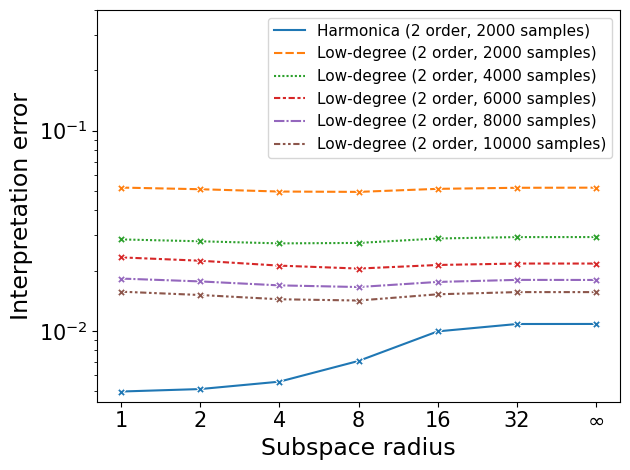

In [25]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

index = ["1","2","4","8","16","32","∞"] 
df_L2 = pd.DataFrame(L2_inconsistency.T, index, method_legend_name) 

ax_L2 = sns.lineplot(data=df_L2, marker='X') 
# ax_L2.set(xlabel='subspace radius', ylabel='Inconsistency') 
plt.xlabel('Subspace radius', fontsize=17)
plt.ylabel('Interpretation error', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax_L2.set(yscale='log')
ax_L2.set(ylim=[0,0.4])
fig_L2 = ax_L2.get_figure() 
ax_L2.legend(fontsize=11)
plt.tight_layout()
fig_L2.savefig("low-degree-sample-number-plot-l2.pdf")

/home/hehaowei/.conda/envs/truthful/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


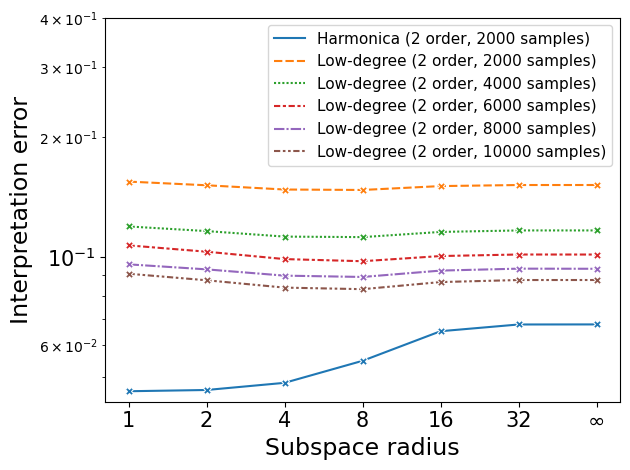

In [24]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

index = ["1","2","4","8","16","32","∞"]
df_L1 = pd.DataFrame(L1_inconsistency.T, index, method_legend_name)

ax_L1 = sns.lineplot(data=df_L1, marker='X')
# ax_L1.set(xlabel='subspace radius', ylabel='Inconsistency')
plt.xlabel('Subspace radius', fontsize=17)
plt.ylabel('Interpretation error', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax_L1.set(yscale='log')
ax_L1.set(ylim=[0,0.4])
fig_L1 = ax_L1.get_figure() 
ax_L1.legend(fontsize=11)
plt.tight_layout()
fig_L1.savefig("low-degree-sample-number-plot-l1.pdf")

/home/hehaowei/.conda/envs/truthful/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


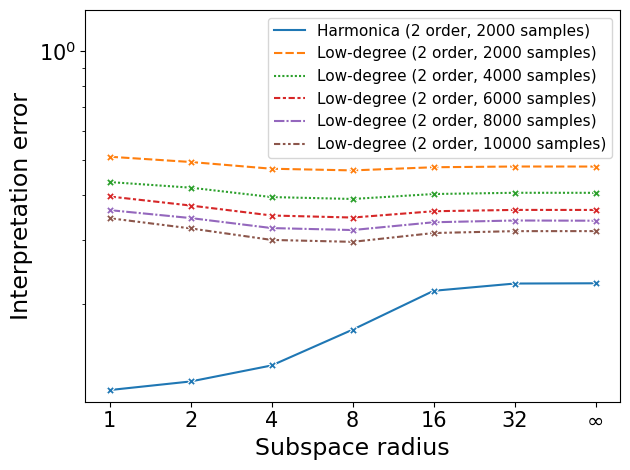

In [28]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

index = ["1","2","4","8","16","32","∞"] 
df_L0 = pd.DataFrame(L0_inconsistency.T, index, method_legend_name) 

ax_L0 = sns.lineplot(data=df_L0, marker='X') 
# ax_L0.set(xlabel='subspace radius', ylabel='Inconsistency') 
plt.xlabel('Subspace radius', fontsize=17)
plt.ylabel('Interpretation error', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax_L0.set(yscale='log')
ax_L0.set(ylim=[0,1.3])
fig_L0 = ax_L0.get_figure() 
ax_L0.legend(fontsize=11)
plt.tight_layout()
fig_L0.savefig("low-degree-sample-number-plot-l0.pdf")